In [6]:
import pandas as pd
import numpy as np
import feather
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing trip data for March 2016 and Weather data from Weather Underground. 

The source data is read in a separate Python class. It is manipulated as a DataFrame and finally exported into Feather format. The exported file is imported in this notebook. To read more about Feather, read https://blog.rstudio.org/2016/03/29/feather/

The benefit of doing this were:
- The ETL part of the analysis is in a separate file (CitiBike_ETL.py)
- The Feather file can read in R also
- During analysis, this notebook will be run multiple times and it is efficient to just import the DataFrame

In [3]:
bikedata = feather.read_dataframe('../../Data/CitiBike_Data/bikedata.feather')
print bikedata.columns
print len(bikedata)

Index([u'bikeid', u'birth year', u'date', u'dtstartdatehour',
       u'dtstopdatehour', u'end station id', u'end station latitude',
       u'end station longitude', u'end station name', u'female', u'male',
       u'start station id', u'start station latitude',
       u'start station longitude', u'start station name', u'starttime',
       u'stoptime', u'tripduration', u'usertype'],
      dtype='object')
9650860


## Initial Data Analysis

#### How many trips start and end at the same station?

We can see that only 1.4% of the bikes start and end at the same station (Apr 2015 - Mar 2016)

In [29]:
float(len(bikedata[bikedata['start station id'] == bikedata['end station id']]))*100/len(bikedata)

1.4080195961810658

#### Which Start and End stations are the busiest?

In [31]:
bikedata.groupby(by=['start station id'])['bikeid'].count().sort_values(ascending=False).head()

start station id
519    113690
521     97786
293     95857
435     90841
497     83749
Name: bikeid, dtype: int64

In [3]:
bikedata.groupby(by='start station name').bikeid.count().sort_values(ascending=False)

start station name
Pershing Square North                113690
8 Ave & W 31 St                       97786
Lafayette St & E 8 St                 95857
W 21 St & 6 Ave                       90841
E 17 St & Broadway                    83749
Broadway & E 14 St                    72774
Broadway & E 22 St                    68279
Greenwich Ave & 8 Ave                 68137
Cleveland Pl & Spring St              65974
West St & Chambers St                 65093
W 41 St & 8 Ave                       64402
Carmine St & 6 Ave                    63484
8 Ave & W 33 St                       62834
Lexington Ave & E 24 St               60883
W 20 St & 11 Ave                      59075
Lafayette St & Jersey St              58985
Barrow St & Hudson St                 58890
Christopher St & Greenwich St         58031
Vesey Pl & River Terrace              57560
University Pl & E 14 St               57406
W 42 St & 8 Ave                       57111
W 31 St & 7 Ave                       56946
Broadway & W 

In [7]:
tips = sns.load_dataset(final_df)

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="startdatehour", y="bikeid", hue="usertype", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

IOError: [Errno 63] File name too long: '/Users/Divya/seaborn-data/         dtstartdatehour  bikeid        date  male_to_female_ratio  fog  rain  \\\n0    2015-04-01 02:00:00       2  2015-04-01              1.000000    0     0   \n1    2015-04-01 05:00:00       2  2015-04-01              1.000000    0     0   \n2    2015-04-01 06:00:00      12  2015-04-01              1.000000    0     0   \n3    2015-04-01 07:00:00      26  2015-04-01              1.000000    0     0   \n4    2015-04-01 08:00:00      21  2015-04-01              0.952381    0     0   \n5    2015-04-01 09:00:00      16  2015-04-01              0.937500    0     0   \n6    2015-04-01 10:00:00       5  2015-04-01              1.000000    0     0   \n7    2015-04-01 11:00:00       6  2015-04-01              1.000000    0     0   \n8    2015-04-01 12:00:00       3  2015-04-01              0.666667    0     0   \n9    2015-04-01 13:00:00       2  2015-04-01              0.500000    0     0   \n10   2015-04-01 14:00:00       2  2015-04-01              1.000000    0     0   \n11   2015-04-01 15:00:00       4  2015-04-01              1.000000    0     0   \n12   2015-04-01 16:00:00      12  2015-04-01              0.916667    0     0   \n13   2015-04-01 17:00:00      35  2015-04-01              1.000000    0     0   \n14   2015-04-01 18:00:00      42  2015-04-01              0.833333    0     0   \n15   2015-04-01 19:00:00      29  2015-04-01              0.793103    0     0   \n16   2015-04-01 20:00:00       9  2015-04-01              1.000000    0     0   \n17   2015-04-01 21:00:00       4  2015-04-01              0.500000    0     0   \n18   2015-04-02 01:00:00       1  2015-04-02              1.000000    0     0   \n19   2015-04-02 05:00:00       3  2015-04-02              1.000000    0     0   \n20   2015-04-02 06:00:00       9  2015-04-02              1.000000    0     0   \n21   2015-04-02 07:00:00      15  2015-04-02              0.933333    0     0   \n22   2015-04-02 08:00:00      16  2015-04-02              0.875000    0     0   \n23   2015-04-02 09:00:00      11  2015-04-02              0.818182    0     0   \n24   2015-04-02 15:00:00       7  2015-04-02              0.857143    0     0   \n25   2015-04-02 16:00:00      15  2015-04-02              0.866667    0     0   \n26   2015-04-02 17:00:00      33  2015-04-02              0.939394    0     0   \n27   2015-04-02 18:00:00      43  2015-04-02              0.860465    0     0   \n28   2015-04-02 19:00:00      27  2015-04-02              0.814815    0     0   \n29   2015-04-02 20:00:00      10  2015-04-02              1.000000    0     0   \n...                  ...     ...         ...                   ...  ...   ...   \n7027 2016-03-30 13:00:00      13  2016-03-30              0.769231    0     0   \n7028 2016-03-30 14:00:00      14  2016-03-30              0.928571    0     0   \n7029 2016-03-30 15:00:00      12  2016-03-30              0.916667    0     0   \n7030 2016-03-30 16:00:00      29  2016-03-30              0.896552    0     0   \n7031 2016-03-30 17:00:00     101  2016-03-30              0.871287    0     0   \n7032 2016-03-30 18:00:00     114  2016-03-30              0.885965    0     0   \n7033 2016-03-30 19:00:00      33  2016-03-30              0.969697    0     0   \n7034 2016-03-30 20:00:00      11  2016-03-30              0.818182    0     0   \n7035 2016-03-30 21:00:00       7  2016-03-30              0.714286    0     0   \n7036 2016-03-30 22:00:00       3  2016-03-30              0.666667    0     0   \n7037 2016-03-30 23:00:00       3  2016-03-30              1.000000    0     0   \n7038 2016-03-31 05:00:00       1  2016-03-31              1.000000    0     0   \n7039 2016-03-31 06:00:00      13  2016-03-31              1.000000    0     0   \n7040 2016-03-31 07:00:00      40  2016-03-31              1.000000    0     0   \n7041 2016-03-31 08:00:00      42  2016-03-31              0.904762    0     0   \n7042 2016-03-31 09:00:00      48  2016-03-31              0.937500    0     0   \n7043 2016-03-31 10:00:00      16  2016-03-31              0.812500    0     0   \n7044 2016-03-31 11:00:00      11  2016-03-31              1.000000    0     0   \n7045 2016-03-31 12:00:00       7  2016-03-31              0.857143    0     0   \n7046 2016-03-31 13:00:00       6  2016-03-31              1.000000    0     0   \n7047 2016-03-31 14:00:00      13  2016-03-31              0.923077    0     0   \n7048 2016-03-31 15:00:00      17  2016-03-31              0.882353    0     0   \n7049 2016-03-31 16:00:00      31  2016-03-31              0.838710    0     0   \n7050 2016-03-31 17:00:00     121  2016-03-31              0.900826    0     0   \n7051 2016-03-31 18:00:00      86  2016-03-31              0.848837    0     0   \n7052 2016-03-31 19:00:00      37  2016-03-31              0.972973    0     0   \n7053 2016-03-31 20:00:00      13  2016-03-31              0.846154    0     0   \n7054 2016-03-31 21:00:00       5  2016-03-31              0.400000    0     0   \n7055 2016-03-31 22:00:00       6  2016-03-31              1.000000    0     0   \n7056 2016-03-31 23:00:00       5  2016-03-31              0.800000    0     0   \n\n      snow  hail  thunder  tornado  meantempm  maxtempm  meanvisi  \\\n0        0     0        0        0          6        11        10   \n1        0     0        0        0          6        11        10   \n2        0     0        0        0          6        11        10   \n3        0     0        0        0          6        11        10   \n4        0     0        0        0          6        11        10   \n5        0     0        0        0          6        11        10   \n6        0     0        0        0          6        11        10   \n7        0     0        0        0          6        11        10   \n8        0     0        0        0          6        11        10   \n9        0     0        0        0          6        11        10   \n10       0     0        0        0          6        11        10   \n11       0     0        0        0          6        11        10   \n12       0     0        0        0          6        11        10   \n13       0     0        0        0          6        11        10   \n14       0     0        0        0          6        11        10   \n15       0     0        0        0          6        11        10   \n16       0     0        0        0          6        11        10   \n17       0     0        0        0          6        11        10   \n18       0     0        0        0         12        19        10   \n19       0     0        0        0         12        19        10   \n20       0     0        0        0         12        19        10   \n21       0     0        0        0         12        19        10   \n22       0     0        0        0         12        19        10   \n23       0     0        0        0         12        19        10   \n24       0     0        0        0         12        19        10   \n25       0     0        0        0         12        19        10   \n26       0     0        0        0         12        19        10   \n27       0     0        0        0         12        19        10   \n28       0     0        0        0         12        19        10   \n29       0     0        0        0         12        19        10   \n...    ...   ...      ...      ...        ...       ...       ...   \n7027     0     0        0        0          8        13        10   \n7028     0     0        0        0          8        13        10   \n7029     0     0        0        0          8        13        10   \n7030     0     0        0        0          8        13        10   \n7031     0     0        0        0          8        13        10   \n7032     0     0        0        0          8        13        10   \n7033     0     0        0        0          8        13        10   \n7034     0     0        0        0          8        13        10   \n7035     0     0        0        0          8        13        10   \n7036     0     0        0        0          8        13        10   \n7037     0     0        0        0          8        13        10   \n7038     0     0        0        0         16        23        10   \n7039     0     0        0        0         16        23        10   \n7040     0     0        0        0         16        23        10   \n7041     0     0        0        0         16        23        10   \n7042     0     0        0        0         16        23        10   \n7043     0     0        0        0         16        23        10   \n7044     0     0        0        0         16        23        10   \n7045     0     0        0        0         16        23        10   \n7046     0     0        0        0         16        23        10   \n7047     0     0        0        0         16        23        10   \n7048     0     0        0        0         16        23        10   \n7049     0     0        0        0         16        23        10   \n7050     0     0        0        0         16        23        10   \n7051     0     0        0        0         16        23        10   \n7052     0     0        0        0         16        23        10   \n7053     0     0        0        0         16        23        10   \n7054     0     0        0        0         16        23        10   \n7055     0     0        0        0         16        23        10   \n7056     0     0        0        0         16        23        10   \n\n      maxhumidity  precipm  \n0              82        0  \n1              82        0  \n2              82        0  \n3              82        0  \n4              82        0  \n5              82        0  \n6              82        0  \n7              82        0  \n8              82        0  \n9              82        0  \n10             82        0  \n11             82        0  \n12             82        0  \n13             82        0  \n14             82        0  \n15             82        0  \n16             82        0  \n17             82        0  \n18             41        0  \n19             41        0  \n20             41        0  \n21             41        0  \n22             41        0  \n23             41        0  \n24             41        0  \n25             41        0  \n26             41        0  \n27             41        0  \n28             41        0  \n29             41        0  \n...           ...      ...  \n7027           54        0  \n7028           54        0  \n7029           54        0  \n7030           54        0  \n7031           54        0  \n7032           54        0  \n7033           54        0  \n7034           54        0  \n7035           54        0  \n7036           54        0  \n7037           54        0  \n7038           73        0  \n7039           73        0  \n7040           73        0  \n7041           73        0  \n7042           73        0  \n7043           73        0  \n7044           73        0  \n7045           73        0  \n7046           73        0  \n7047           73        0  \n7048           73        0  \n7049           73        0  \n7050           73        0  \n7051           73        0  \n7052           73        0  \n7053           73        0  \n7054           73        0  \n7055           73        0  \n7056           73        0  \n\n[7057 rows x 15 columns].csv'

In [4]:
# How many bikes will leave a particular station at a particular time?
# First let's start with a single station. In our case, let's start with E 40 St & 5 Ave
# dfFocusStation = bikedata[(bikedata['start station name'] == "E 40 St & 5 Ave") & (bikedata['usertype'] == 'Subscriber')]
dfFocusStation = bikedata[(bikedata['start station name'] == "Pershing Square North")]

dfGroupBy = dfFocusStation.groupby(by=['dtstartdatehour'])

# Number of departures per hour
departures = dfGroupBy.bikeid.count().reset_index()

# Date column
departures['date'] =  dfGroupBy.date.max().reset_index().date

# Male to female ratio
sum_male = dfGroupBy.male.sum().reset_index().male
sum_female = dfGroupBy.female.sum().reset_index().female
departures['male_to_female_ratio'] = (sum_male).astype(float) / (sum_male + sum_female)

print departures.head()

      dtstartdatehour  bikeid        date  male_to_female_ratio
0 2015-04-01 02:00:00       2  2015-04-01              1.000000
1 2015-04-01 05:00:00       2  2015-04-01              1.000000
2 2015-04-01 06:00:00      12  2015-04-01              1.000000
3 2015-04-01 07:00:00      26  2015-04-01              1.000000
4 2015-04-01 08:00:00      21  2015-04-01              0.952381


In [5]:
# Join with weather data
weather_file = './data/temperature/weather.csv'
weather = pd.read_csv(weather_file)
weather.drop('Unnamed: 0', axis=1, inplace=True)

final_df = pd.merge(departures, weather, on='date', how='left')
final_df.head()

,dtstartdatehour,bikeid,date,male_to_female_ratio,fog,rain,snow,hail,thunder,tornado,meantempm,maxtempm,meanvisi,maxhumidity,precipm
0,2015-04-01 02:00:00,2,2015-04-01,1.000000,0,0,0,0,0,0,6,11,10,82,0
1,2015-04-01 05:00:00,2,2015-04-01,1.000000,0,0,0,0,0,0,6,11,10,82,0
2,2015-04-01 06:00:00,12,2015-04-01,1.000000,0,0,0,0,0,0,6,11,10,82,0
3,2015-04-01 07:00:00,26,2015-04-01,1.000000,0,0,0,0,0,0,6,11,10,82,0
4,2015-04-01 08:00:00,21,2015-04-01,0.952381,0,0,0,0,0,0,6,11,10,82,0


In [ ]:
final_df.describe()
# plt.bar(final_df.date, final_df.bikeid)
final_df.meanvisi.fillna(0, inplace=True)

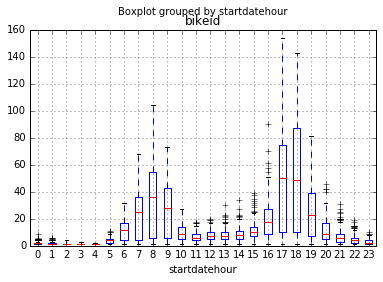

In [28]:
final_df['startdatehour'] = final_df.dtstartdatehour.dt.hour
# plt.boxplot([(final_df.bikeid), (final_df.dtstartdatehour.dt.hour)])
final_df.boxplot(column='bikeid', by='startdatehour')